<a href="https://colab.research.google.com/github/DhawalKhandait/Online-Retail-Customer-Segmentation-Clustering/blob/main/Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Online Retail Customer Segmentation**



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** **Dhawal Khandait**


## **What is Customer Segmentation -**
* Customer segmentation is the process of separating customers into groups on the basis of their shared behavior or other attributes.
* The groups should be homogeneous within themselves and should also be heterogeneous to each other.
* Customer segmentation can help a company to understand how its customers are alike, what is important to them, and what is not.
* The overall aim of this process is to identify high-value customer base i.e. customers that have the highest growth potential or are the most profitable.
* Such information can be used to develop personalized relevant content for different customer bases.
* Many studies have found that customers appreciate such individual attention and are more likely to respond and buy the product.

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


### **In this project, your task is to identify major customer segments on a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import datetime as dt
from numpy import math
from pylab import rcParams

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Clustering (ML)/Online Retail.csv")

In [4]:
# copying the original dataset
data = df.copy()

### Dataset First View

In [5]:
# Dataset First Look
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [6]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
# computing number of rows
rows= len(data.axes[0])

# computing number of columns
cols=len(data.axes[1])

print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  541909
Number of Columns:  8


### Dataset Information

In [8]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
data.duplicated().sum()

5268

In [10]:
data[data.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/10 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/10 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/10 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/10 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/10 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/11 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/11 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/11 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/11 11:34,2.10,14446.0,United Kingdom


In [11]:
# deleting duplicated values from dataset
data=data.drop_duplicates()

In [12]:
# Dataset after drop Duplicate Value Count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [13]:
# Missing Values/Null Values Count
# Count total NaN at each row in a DataFrame

data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

<Axes: >

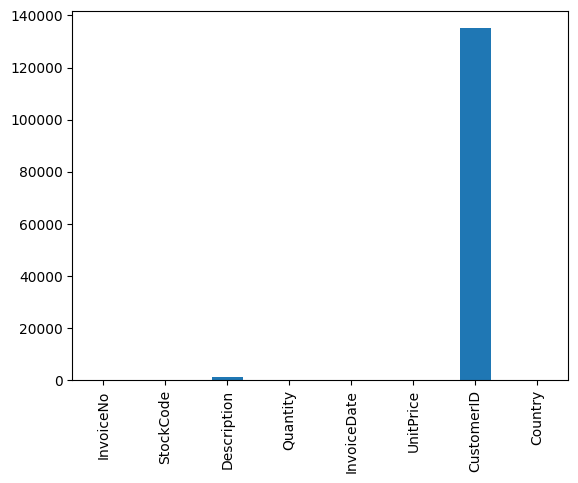

In [14]:
# Visualizing the missing values
data.isnull().sum().plot(kind='bar')

### What did you know about your dataset?

In the dataset **CustomerID** column has **135037** null values are present and **Description** column has less number of null values which is 1454

In [15]:
# deleting the null values
data.dropna(inplace=True)

In [16]:
# Count total NaN at each row after drop null values in a DataFrame
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [17]:
# Shape of data
data.shape

(401604, 8)

After drop null value and drop duplicates value from dataset the shape of dataset is (401604, 8)

## ***2. Understanding Your Variables***

In [18]:
# Dataset Columns
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [19]:
# Dataset Describe
data.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


### Variables Description

## **Attribute Information:**
**InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

**StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

**Description**: Product (item) name. Nominal.

**Quantity:** The quantities of each product (item) per transaction. Numeric.

**InvoiceDate:** Invice Date and time. Numeric, the day and time when each transaction was generated.

**UnitPrice:** Unit price. Numeric, Product price per unit in sterling.

**CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

**Country:** Country name. Nominal, the name of the country where each customer resides.

### **Need to drop some InvoiceNo which are starts with 'C',  because 'C' indicates a cancellation**

In [20]:
# Change the dtype of InvoiceNo column
data['InvoiceNo'] = data['InvoiceNo'].astype('str')

In [21]:
# Data which is InvoiceID column is not start from C
data=data[~data['InvoiceNo'].str.contains('C')]

In [22]:
# Shape of data
data.shape

(392732, 8)

In [23]:
# Describe data
data.describe()

,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


### Check Unique Values for each variable.

In [24]:
# Check Unique Values for each variable.
data.nunique()

InvoiceNo      18536
StockCode       3665
Description     3877
Quantity         302
InvoiceDate    17286
UnitPrice        441
CustomerID      4339
Country           37
dtype: int64

## 3. ***Data Wrangling***

### What all manipulations have you done and insights you found?

* CustomerId has maximum num of null so, droping the null values was the best solution.
* Dataset had lots of duplicate values so deleting them was the best solution.
* Drop some InvoiceNo which are starts with 'C', because 'C' indicates a cancellation.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [75]:
Description_df = data['Description'].value_counts().reset_index()
Description_df.rename(columns={'index' : 'Description_Name'}, inplace=True)
Description_df.rename(columns={'Description' : 'Count'}, inplace=True)
Description_df.head()

,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,REGENCY CAKESTAND 3 TIER,1714
2,JUMBO BAG RED RETROSPOT,1615
3,ASSORTED COLOUR BIRD ORNAMENT,1395
4,PARTY BUNTING,1390


In [76]:
Description_df.tail()


,Description_Name,Count
3872,GREEN WITH METAL BAG CHARM,1
3873,WHITE WITH METAL BAG CHARM,1
3874,BLUE/NAT SHELL NECKLACE W PENDANT,1
3875,PINK EASTER HENS+FLOWER,1
3876,"PAPER CRAFT , LITTLE BIRDIE",1


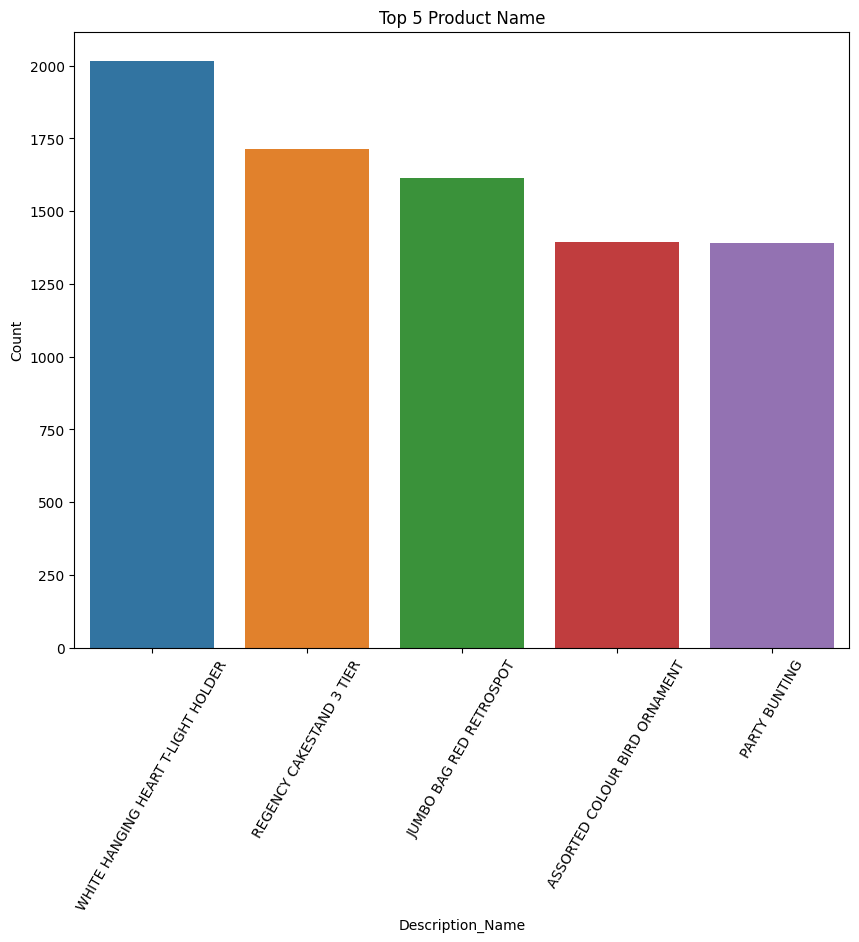

In [77]:
# Chart - 1 Plot of Top 5 Product Name
plt.figure(figsize=(10,8))
plt.title('Top 5 Product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[:5])
plt.xticks(rotation=60)
plt.show()

##### 1. Why did you pick the specific chart?

The bar graph helps to compare the different sets of data among different groups easily.



##### 2. What is/are the insight(s) found from the chart?

**Top product based on maximum selling are :**

1.WHITE HANGING HEART T-LIGHT HOLDER

2.REGENCY CAKESTAND 3 TIER

3.JUMBO BAG RED RETROSPOT

4.ASSORTED COLOUR BIRD ORNAMENT

5.PARTY BUNTING

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, above bar-plot helps creating positive business impact.

#### Chart - 2

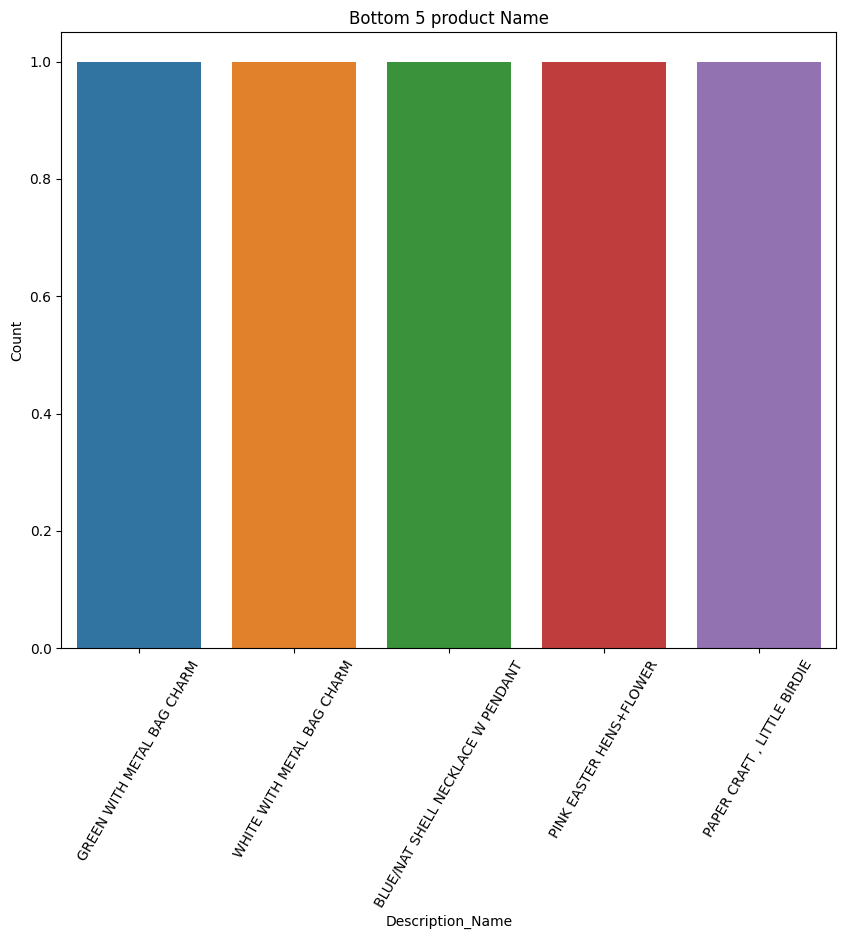

In [78]:
# Chart - 2 plot of Bottom 5 product Name
plt.figure(figsize=(10,8))
plt.title('Bottom 5 product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[-5:])
plt.xticks(rotation=60)
plt.show()

##### 1. Why did you pick the specific chart?

The bar graph helps to compare the different sets of data among different groups easily.



##### 2. What is/are the insight(s) found from the chart?

**Bottom 5 Product based on the selling are:**

1.gREEN WITH METAL BAG CHARM

2.WHITE WITH METAL BAG CHARM

3.BLUE/NAT SHELL NECKLACEW PENDANT

4.PINK EASTER HENS+FLOWER

5.PAPER CRAFT, LITTLE BIRDIE

#### Chart - 3

In [79]:
Stockcode_df = data['StockCode'].value_counts().reset_index()
Stockcode_df.rename(columns={'index':'StockCode_Name', 'StockCode':'Count'}, inplace=True)
Stockcode_df.head()

,StockCode_Name,Count
0,85123A,2023
1,22423,1714
2,85099B,1615
3,84879,1395
4,47566,1390


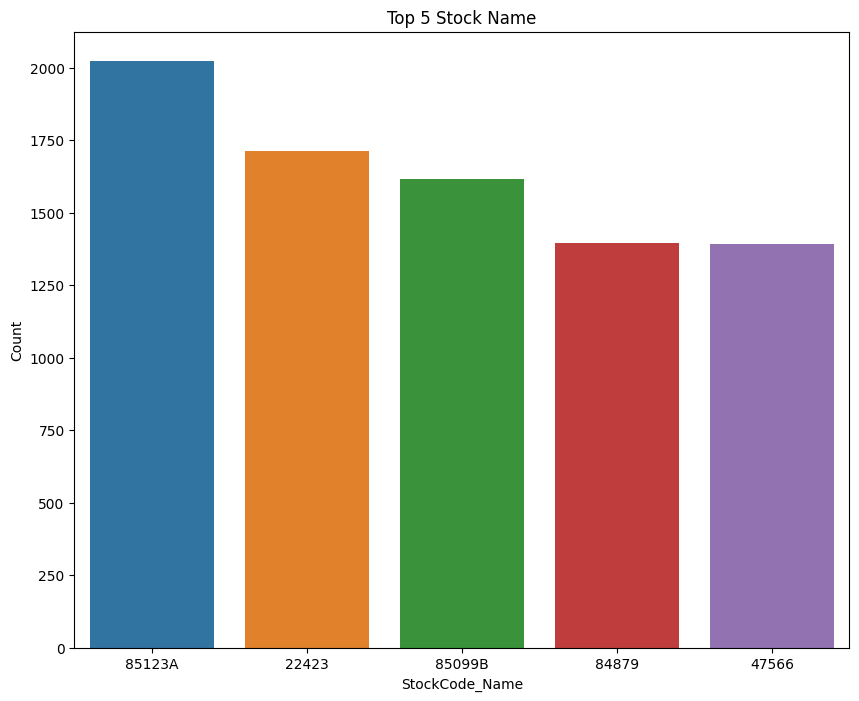

In [80]:
# Chart - 3 Plot of Top 5 Stock Name
plt.figure(figsize=(10,8))
plt.title('Top 5 Stock Name')
sns.barplot(x='StockCode_Name', y='Count', data=Stockcode_df[:5])
plt.show()

##### 1. Why did you pick the specific chart?

The bar graph helps to compare the different sets of data among different groups easily.

##### 2. What is/are the insight(s) found from the chart?

**Top 5 Stock name based on selling are :**

1.85123A

2.22423

3.85099B

4.84879

5.47566

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, above plot help creaeting positive business impact. It shows Top 5 stocks that are mostly sale.


#### Chart - 4

In [81]:
Stockcode_df.tail()

,StockCode_Name,Count
3660,20678,1
3661,90059D,1
3662,90168,1
3663,90169,1
3664,23843,1


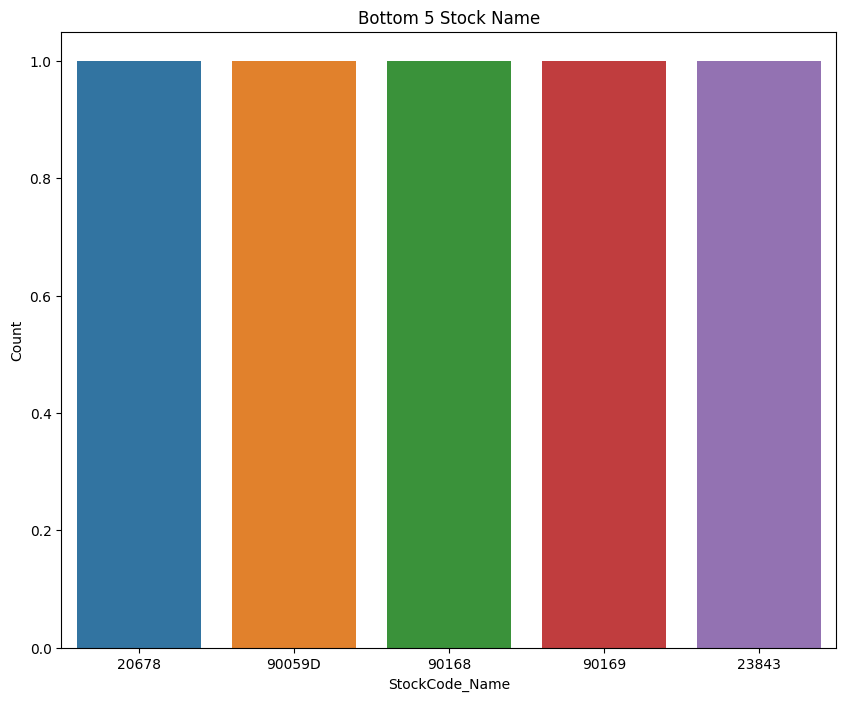

In [82]:
# Chart - 4 Plot of Bottom 5 Stock Name
plt.figure(figsize=(10,8))
plt.title('Bottom 5 Stock Name')
sns.barplot(x='StockCode_Name', y='Count', data=Stockcode_df[-5:])
plt.show()

##### 1. Why did you pick the specific chart?

The bar graph helps to compare the different sets of data among different groups easily.

##### 2. What is/are the insight(s) found from the chart?

**Bottom 5 Stock Name Based on Selling are :**

1) 20678

2) 90059D

3) 90168

4) 90169

5) 23843

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, above gained insight helps creating positive business impact , as it helps  us prevent shortage of stocks.

#### Chart - 5

In [83]:
Country_df = df['Country'].value_counts().reset_index()
Country_df.rename(columns={'index':'Country_Name', 'Country':'Count'}, inplace=True)
Country_df.head()

,Country_Name,Count
0,United Kingdom,495478
1,Germany,9495
2,France,8557
3,EIRE,8196
4,Spain,2533


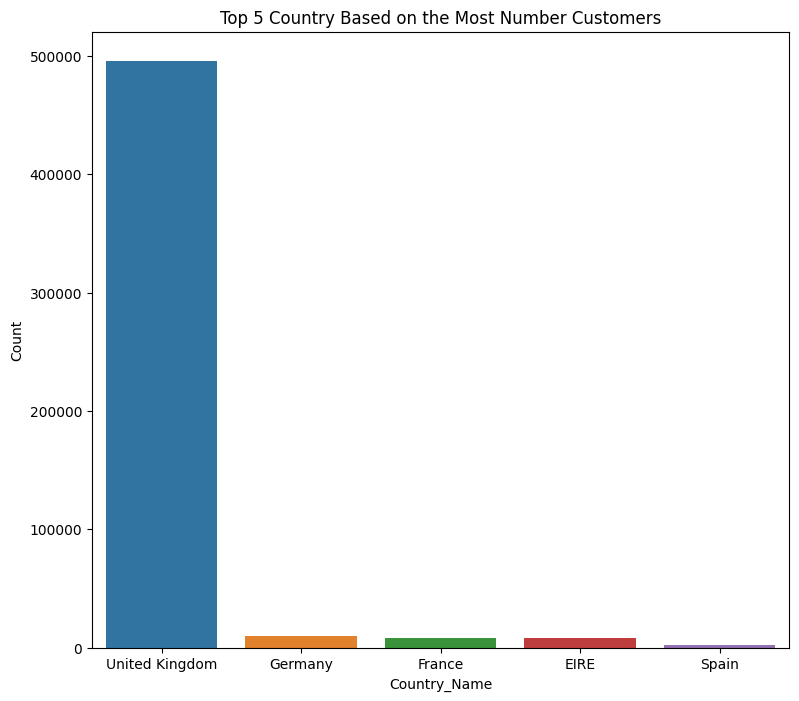

In [84]:
# Chart - 5 Plot of Top 5 Country having maximum number of customers
plt.figure(figsize=(9,8))
plt.title('Top 5 Country Based on the Most Number Customers')
sns.barplot(x='Country_Name', y='Count', data=Country_df[:5])
plt.show()

In [85]:
# checking the transaction % in UK
uk_trnsc = round(len(df[df['Country']=='United Kingdom']) / len(df) * 100,2)
print(f"{uk_trnsc}% transaction are from United Kingdom")

91.43% transaction are from United Kingdom


##### 1. Why did you pick the specific chart?

The bar graph helps to compare the different sets of data among different groups easily.

##### 2. What is/are the insight(s) found from the chart?

- From this graph we can see that **most of the customers are from United Kingdom ,Germany ,France ,EIRE and Spain**
- **91.43% transaction are from United Kingdom**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Above plot help creating positive business impact. From the above plot we can conclude the selling done with respect to the countries

#### Chart - 6

In [86]:
Country_df.tail()

,Country_Name,Count
33,Lithuania,35
34,Brazil,32
35,Czech Republic,30
36,Bahrain,19
37,Saudi Arabia,10


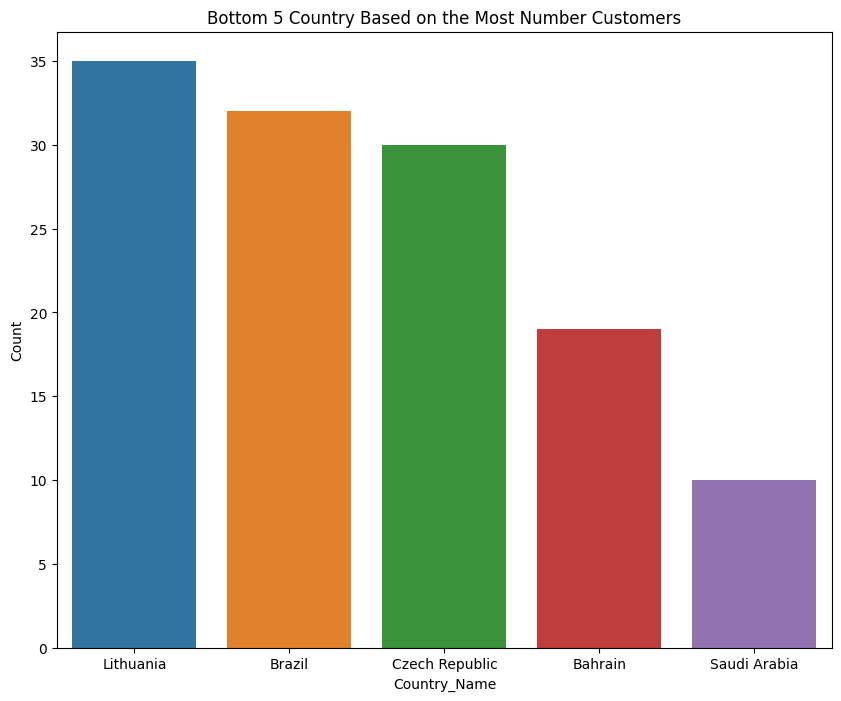

In [87]:
# Chart - 6 Plot of Bottom 5 Country having maximum number of customers
plt.figure(figsize=(10,8))
plt.title('Bottom 5 Country Based on the Most Number Customers')
sns.barplot(x='Country_Name', y='Count', data=Country_df[-5:])
plt.show()

##### 1. Why did you pick the specific chart?

The bar graph helps to compare the different sets of data among different groups easily.

##### 2. What is/are the insight(s) found from the chart?

* From this graph we can see that **least number of customers from Lithuania,Brazil, Czech Republic ,Bahrain and Saudi Arabia**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In order to create positive business impact,the customers are less in above counties so  we need to increase thr sales in above mentioned countries.

#### Chart - 7

In [32]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [33]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [34]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [35]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [36]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [37]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [38]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [39]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [40]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [41]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [42]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [43]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [44]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [45]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [46]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [47]:
# Expand Contraction

#### 2. Lower Casing

In [48]:
# Lower Casing

#### 3. Removing Punctuations

In [49]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [50]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [51]:
# Remove Stopwords

In [52]:
# Remove White spaces

#### 6. Rephrase Text

In [53]:
# Rephrase Text

#### 7. Tokenization

In [54]:
# Tokenization

#### 8. Text Normalization

In [55]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [56]:
# POS Taging

#### 10. Text Vectorization

In [57]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [58]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [59]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [60]:
# Transform Your data

### 6. Data Scaling

In [61]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [62]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [63]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [64]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [65]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [66]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [67]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [68]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [69]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [70]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [71]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [72]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [73]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [74]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***